In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Covarience Function:
$$Cov(X, Y) = \frac{\sum_{i=1}^{m} \left((X_i - \bar{X})(Y_i - \bar{Y})\right)}{n-1}$$

Here,

$X$ is the set of teh values of a single feature

$Y$ is the set of teh values of another single feature on a different dimension

In [38]:
def getCov(f1, f1Mean, f2, f2Mean):
    length = f1.shape[0]
    sum = 0
    for i in range(0, length-1):
        sum += (f1[i] - f1Mean)*(f2[i] - f2Mean)
    result = sum/(length-1)
    return result

In [39]:
def getCovMatrix(features, featureMeans):
    numFeatures = int(features.shape[1])
    covMatrix = np.zeros((numFeatures, numFeatures)) # generate an empty square matrix

    # fill the matrix with covariences
    for i in range(0, numFeatures):
        for j in range(0, numFeatures):
            cov = getCov(features[:, i], featureMeans[i], features[:, j], featureMeans[j])
            covMatrix[i][j] = cov
    return covMatrix

In [40]:
# Load the dataset
df = pd.read_csv('3featureData.csv')
df.head()

,Car Age,Mileage(thousand miles),Engine Size,Price(thousand dollars)
0,3,30,1.8,15.0
1,5,60,2.0,12.0
2,2,15,1.6,18.0
3,4,40,2.2,14.0
4,1,10,1.8,22.0


In [41]:
# split the data into features and target
features = np.array(df.iloc[:, :-1])  # All columns except the last one as features
targets = np.array(df.iloc[:, -1])    # Last column as target

In [42]:
def setGraph():
    plt.style.use('dark_background')
    plt.minorticks_on()
    plt.grid(which='minor', linestyle=':', alpha=0.5, color='gray')
    plt.grid(which='major', linestyle='--', alpha=0.7, color='white')
    # Draw x=0 and y=0 lines to show origin
    plt.axhline(0, color='white', linewidth=1)
    plt.axvline(0, color='white', linewidth=1)

def set3Dgraph():
    plt.style.use('dark_background')
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    return ax

Text(0.5, 0.92, 'Raw graph(not centered)')

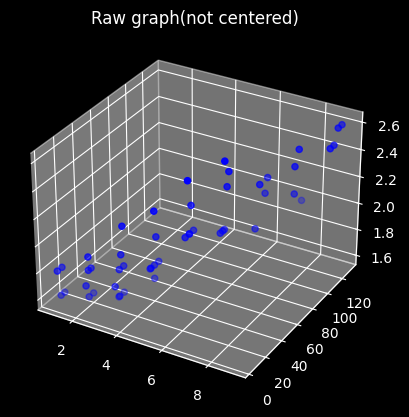

In [43]:
if features.shape[1] == 2:
    setGraph()
    plt.scatter(features[:, 0], features[:, 1], color='lightblue')
elif features.shape[1] == 3:
    pltThree = set3Dgraph()
    pltThree.scatter(features[:, 0], features[:, 1], features[:, 2], color='blue', marker='o')
plt.title("Raw graph(not centered)")

array([ 4.69387755, 53.59183673,  2.00816327])

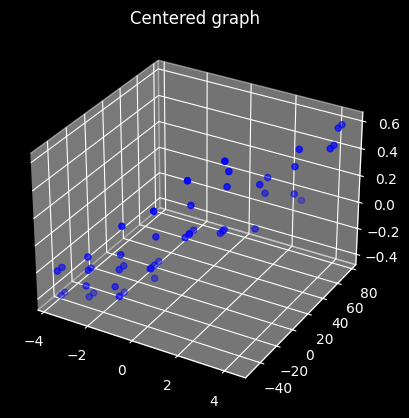

In [44]:
# center the data at the origin
featureMeans = np.array([])
for i in range(0, features.shape[1]):
    featureMeans = np.append(featureMeans, features[:, i].mean())
features = features - featureMeans # substract corresponding mean from each feature

if features.shape[1] == 2:
    setGraph()
    plt.scatter(features[:, 0], features[:, 1], color='lightblue')
elif features.shape[1] == 3:
    pltThree = set3Dgraph()
    pltThree.scatter(features[:, 0], features[:, 1], features[:, 2], color='blue', marker='o')
plt.title("Centered graph")
featureMeans

In [45]:
covMatrix = getCovMatrix(features, featureMeans) # get the covarience matrix of the features
covMatrix

array([[  27.07127239,  326.16603325,    9.89846505],
       [ 326.16603325, 4005.92021554,  114.86022664],
       [   9.89846505,  114.86022664,    4.10724785]])

In [46]:
eigVals, eigVecs = np.linalg.eig(covMatrix) # get eigenvalues and eigenvectors

# sort eigenvalues (descending) and sort eigenvectors accordingly
idx = np.argsort(eigVals)[::-1]
eigVals = eigVals[idx]
eigVecs = eigVecs[:, idx]

eigVals, eigVecs

(array([4.03577691e+03, 1.22440506e+00, 9.74224900e-02]),
 array([[-0.08113341,  0.60202909, -0.79434146],
        [-0.99629332, -0.07184126,  0.04731233],
        [-0.02858309,  0.7952357 ,  0.60562628]]))

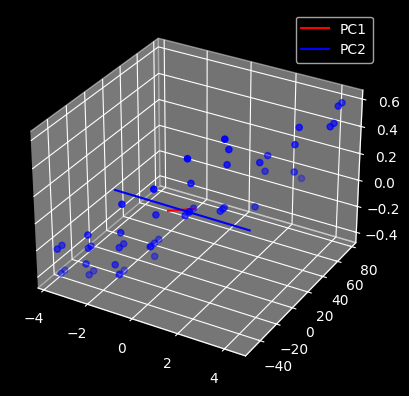

In [47]:
# pick eigenvector for largest eigenvalue
v1 = eigVecs[:, 0]
v2 = eigVecs[:, 1]

if features.shape[1] == 2:
    setGraph()
    plt.scatter(features[:, 0], features[:, 1], color='lightblue')
elif features.shape[1] == 3:
    pltThree = set3Dgraph()
    pltThree.scatter(features[:, 0], features[:, 1], features[:, 2], color='blue', marker='o')

scale = 5  # adjust to make lines bigger or smaller

# generate points along the lines
line1_x = [-scale*eigVecs[:, 0][0], scale*eigVecs[:, 0][0]]
line1_y = [-scale*eigVecs[:, 0][1], scale*eigVecs[:, 0][1]]
line2_x = [-scale*eigVecs[:, 1][0], scale*eigVecs[:, 1][0]]
line2_y = [-scale*eigVecs[:, 1][1], scale*eigVecs[:, 1][1]]

# plot the lines
plt.plot(line1_x, line1_y, 'r-', label="PC1")
plt.plot(line2_x, line2_y, 'b-', label="PC2")
plt.legend()

In [48]:
# explained variance ratio
explainedVarienceRatio = eigVals / eigVals.sum()

headings = df.columns.tolist()
print("Percentage of contribution of features: ")
for i in range(0, len(headings)-1):
    print(f"{headings[i]}:  {explainedVarienceRatio[i]*100}%")

Percentage of contribution of features: 
Car Age:  99.96725798301308%
Mileage(thousand miles):  0.030328836226391508%
Engine Size:  0.0024131807605230634%
